In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json

In [5]:
file = open('../wind-js/gfs.json')
js=json.load(file)
df = pd.json_normalize(js)

nx = df['header.nx'][0]
ny = df['header.ny'][0]
dx = df['header.dx'][0]
dy = df['header.dy'][0]
lo1 = df['header.lo1'][0]
la1 = df['header.la1'][0]
lo2 = df['header.lo2'][0]
la2 = df['header.la2'][0]

x = np.linspace(lo1, lo2, nx)
y = np.linspace(la1, la2, ny)
xx,yy = np.meshgrid(x,y)

In [6]:
u = np.array(df['data'][0]).reshape(ny,nx)
v = np.array(df['data'][1]).reshape(ny,nx)

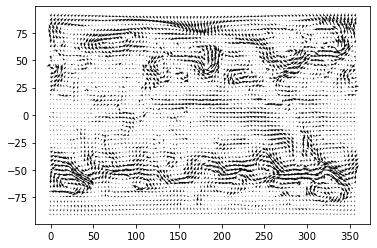

In [7]:
δx=4
δy=δx
plt.quiver(xx[::δx,::δy],yy[::δx,::δy],u[::δx,::δy],v[::δx,::δy])
plt.show()

In [9]:
uu = np.zeros_like(u)
vv = np.zeros_like(v)

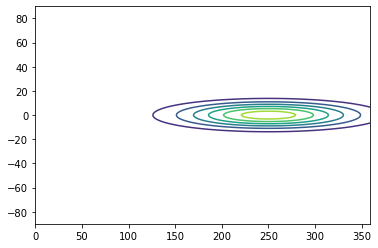

In [91]:
λx = 90
λy = 10
x0=250
y0=0
Δ = 1e8
ϕ = np.exp(-((xx-x0)/λx)**2 -((yy-y0)/λy)**2)/Δ

plt.contour(xx,yy,ϕ)

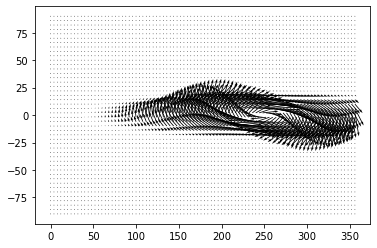

In [92]:
uu = np.gradient(ϕ, axis=0)/dy
vv = np.gradient(ϕ, axis=1)/dx
uu *= np.max(u)/np.max(uu)
vv *= np.max(v)/np.max(vv)
plt.quiver(xx[::δx,::δy],yy[::δx,::δy],uu[::δx,::δy],vv[::δx,::δy])
plt.show()

In [93]:
df=pd.read_json('../wind-js/gfs.json')

In [94]:
df['data'][0] = uu.flatten()
df['data'][1] = vv.flatten()

In [95]:
df['data'][0]

array([ 6.32840683e-36,  6.73052708e-36,  7.15643164e-36, ...,
       -3.45521897e-33, -3.36471284e-33, -3.27576851e-33])

In [96]:
df.to_json('../wind-js/temp.json', orient='records')